## Practica Spotify: *Top 10 canciones*

In [12]:
import os
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import spotipy
from dotenv import load_dotenv
from spotipy.oauth2 import SpotifyClientCredentials
# Cargamos archivo credenciales
load_dotenv()

True

,nombre,popularidad,duracion_minutos
0,"Signed, Sealed, Delivered (I'm Yours)",69,2.68
1,I Just Called To Say I Love You,75,4.37
2,Superstition - Single Version,75,4.09


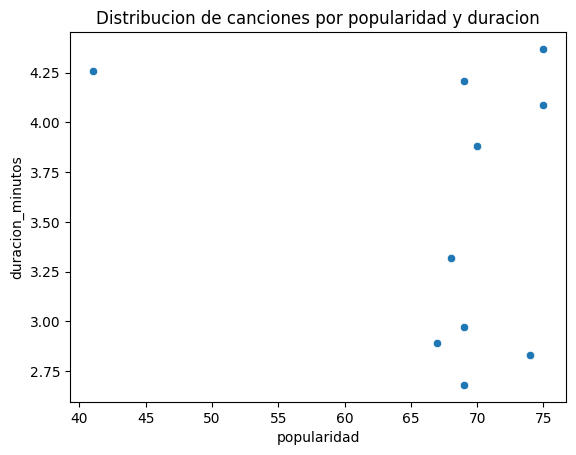

In [13]:
# Creamos instancia de Spotipy
spot = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = "37439c2891954dec8a9173d2bb41dfcb", client_secret = "87c4dd2dbab344db8960f3b6acec2c01"))
# Definimos el identificador del artista                                                             
SW_uri = 'spotify:artist:7guDJrEfX3qb6FEbdPA5qi'
# Extraemos el top 10
top_10_tracks = spot.artist_top_tracks(SW_uri)
# Definimos las listas donde se incluiran las caracteristicas de cada canción
top10_name= []
top10_duration = []
top10_popularity = []
# iteramos sobre el diccionario resultado  top_10_tracks, dentro de la subclave 'tracks'
for track in top_10_tracks['tracks']:
    # extraemos nombre ,duracion y popularidad y añadimos a sus respectivas listas 
    top10_name.append(track['name'])
    top10_duration.append(round((track['duration_ms']/1000)/60, 2))      # convertimos milisegundos a minutos
    top10_popularity.append(track['popularity'])
    
# Creamos dataframe con  los datos de las tres listas
top10_df = pd.DataFrame(list(zip(top10_name, top10_popularity, top10_duration)), columns=['nombre', 'popularidad', 'duracion_minutos'])
# mostramos el dataframe
display(top10_df.head(3))

# definimos el grafico de puntos 
sbn.scatterplot(x='popularidad', y='duracion_minutos', data=top10_df).set_title('Distribucion de canciones por popularidad y duracion', fontsize=12)
# mostramos el grafico
plt.show()

*Conclusiones:*

*No se observa ninguna relación entre duración y popularidad. Casi todos los datos estan distribuidos en el mismo rango de popularidad independientemente de la duración de la canción a excepcion de 'That's What Friends Are For'.*

In [14]:
# Obtengo los álbumes del cantante
albums = spot.artist_albums(SW_uri)

# Se crea lista vacia donde almacenar los id de los albumes
complete_albums_ids = []

# Albums es un diccionario anidado dentro del cual se encuentra la subclave 'items' donde se encuentran los ids
ids = albums['items']

# Iteramos dentro de album['items'] 
for album in ids:
    # En cada iteracion obtenemos el indice ['id'] del elemento album
    complete_albums_ids.append(album['id'])
# mMestra del resultado = uri de cada album
for indice, value in enumerate(complete_albums_ids):
        print(indice, value)

0 3wl8NRDyJ0EDQcj8gu2J3N
1 1baQh54xBX7UyZLGmESkch
2 6hu9W3TWiCF5sETB1pvrHl
3 1AjRRHn7aHgPxBWHlF5sO3
4 1xO2rklexBS68eSOqIU4Il
5 6U9Jnl7C9FVWLE17F2BCuY
6 1nLKZqTGA48v3I8dNFkvQt
7 1kbx6EnG9tGk6qiGkPbTFs
8 2g9Ij40DD7aPaG4hwa8Uab
9 1ZuQduJGh0lBynUsfzD1tH
10 3LSgLZrSXELqWt5eqb6XMY
11 6YUCc2RiXcEKS9ibuZxjt0
12 1kda4McF274Jl5x3aOAmPJ
13 5jgI8Eminx9MmLBontDWq8
14 3PResMqFgQYBfzTnqTKwQw
15 7n0bcoRDylRw5PUKn2PlRJ
16 2oV8OJKtyGR7MwXH45rOoE
17 5Ejztki15nFl3ts3SqjhKE
18 7u0RcxWUGoImmF4LgodaH8
19 0OP3OMK3KZgAwqFA7pgHl5


In [15]:
# Creamos lista donde almacenar todas las canciones
complete_tracks = []
# Iteramos sobre la lista de uris de los albumes solicitando a la api las canciones de cada uno de ellos
for id in complete_albums_ids:
    album_tracks = spot.album_tracks(id, offset=0, market='ES')
    complete_tracks.append(album_tracks)

In [16]:
# Ahora solo hay que repetir el proceso de la practica 1 , aunque en este caso no hay valor de popularidad

# Definimos las listas donde se incluiran las caracteristicas de cada cancion
all_tracks_name= []
all_tracks_duration = []
all_tracks_track_number = []
# Iteramos sobre cada album del diccionario resultado complete_tracks
for album in complete_tracks:
    tracks = album['items']
    # Iteramos sobre cada cancion dentro de cada album = dentro de la subclave album['items']
    for track in tracks:
        # Extraemos // nombre, duracion y numero de track dentro del disco //  añadimos a sus respectivas listas 
        all_tracks_name.append(track['name'])
        all_tracks_duration.append(round((track['duration_ms']/1000)/60, 2))
        all_tracks_track_number.append(track['track_number'])

# Creamos el nuevo dataframe 
stevie_df =pd.DataFrame(list(zip(all_tracks_name, all_tracks_duration, all_tracks_track_number)), columns= ['name', 'duration', 'song number'])
display(stevie_df)

,name,duration,song number
0,Bird Of Beauty - Live 1975,6.64,1
1,Contusion - Live 1975,2.16,2
2,Jam - Live 1975,3.10,3
3,Yea Ya Do - Live 1975,2.35,4
4,Higher Ground - Live 1975,4.36,5
...,...,...,...
275,Blowin' In The Wind - Live/1970,6.68,11
276,By The Time I Get To Phoenix - Live/1970,4.16,12
277,Ca' Purange - Live/1970,6.86,13
278,Alfie - Live/1970,5.14,14


- *Las prácticas demostraron que no existe una relación clara entre la duración y la popularidad de las canciones del top 10 de Stevie Wonder, ya que la mayoría de las canciones presentan una popularidad similar independientemente de su duración.*

- *Además, se logró extraer y analizar una amplia cantidad de canciones (280 en total) de todos sus álbumes, proporcionando una visión integral de su discografía.*

- *La información detallada obtenida permite realizar análisis profundos de las características de sus canciones.*

- *Finalmente, se demostró la eficacia de la API de Spotify junto con Python para extraer, analizar y visualizar datos musicales de manera eficiente.*